In [1]:
# Importing dataset
import pandas as pd
import pathlib
import os

curr_dir = pathlib.Path(os.getcwd())
df = pd.read_csv(curr_dir / "data" / "human_activity.csv").drop(columns=["subject"]) # `subject` constant valued feature
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [2]:
# Output Labels
print(df['Activity'].value_counts())
print(df.shape)

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
(7352, 562)


In [3]:
# Encoding the output labels and splitting the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


In [5]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9809653297076818


In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(max_iter=100), X=X, y=y, cv=5)

In [9]:
score.mean()

np.float64(0.933495007792376)

In [10]:
# Finding the duplicate columns using byte comparison
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns: # column represent a column name and not a series
        current_column = df[column] # series

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [11]:
# Finding the duplicate columns
duplicate_columns = get_duplicate_columns(X_train)
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [12]:
# Dropping all duplicate columns
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

# Almost 31 columns are duplicate
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


In [13]:
# Filter Method 1: Variance Threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)

,threshold,0.05


In [14]:
# get_support(): The features which are selected (who's variance is more than the threshold)
sum(sel.get_support())

np.int64(349)

In [15]:
# Selecting the features
X_train = sel.transform(X_train) # Retures numpy array
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

In [16]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [17]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


---

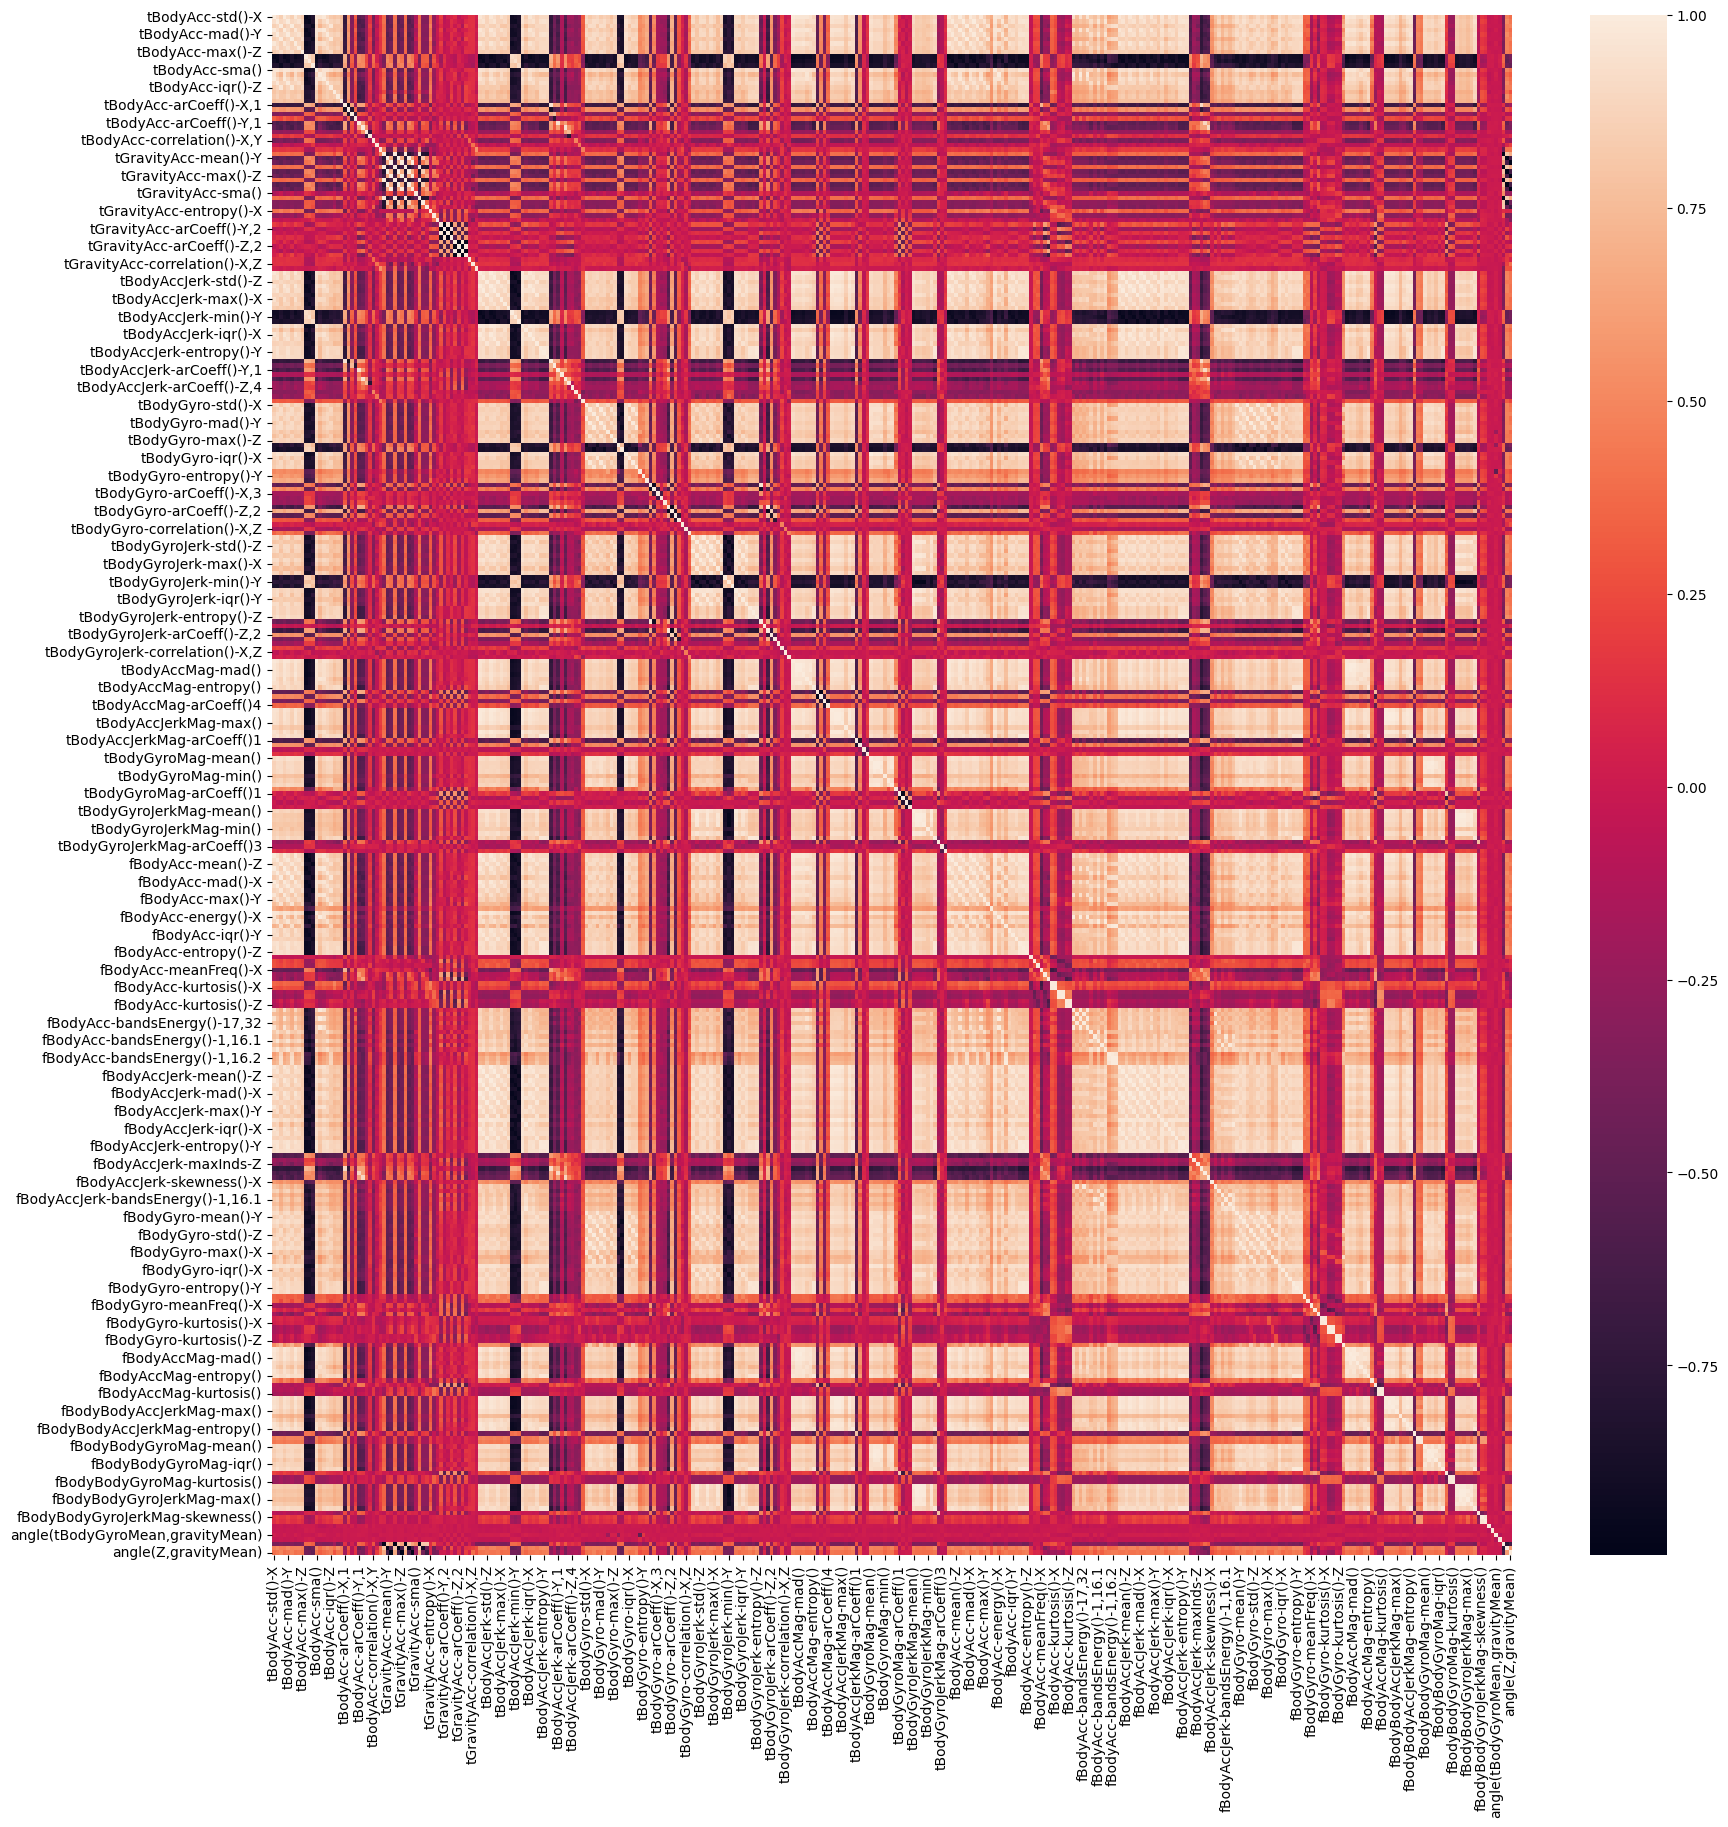

In [18]:
# Filter Method 2 - Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr())
plt.show() # Lots of features are duplicate that's why they are showing high correlation between them

In [19]:
corr_matrix = X_train.corr()
corr_matrix.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548


In [20]:

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95: # Removing multicolinear features
            columns_to_drop.append(columns[j])

print(len(set(columns_to_drop)))

197


In [21]:
# Dropping the features
columns_to_drop = set(columns_to_drop)

X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [22]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


---

In [23]:
# Filter Method 3 - ANOVA (num-cat relationship)
from sklearn.feature_selection import f_classif # For calculating the scores (ANOVA F-value)
from sklearn.feature_selection import SelectKBest # K highest scores

sel = SelectKBest(score_func=f_classif, k=100)
sel.fit(X_train, y_train)

,score_func,<function f_c...0017921E04540>
,k,100


In [24]:
# display selected feature names
sum(sel.get_support())

np.int64(100)

In [25]:
# Selecting the features
columns = X_train.columns[sel.get_support()]

In [26]:
# Transforming
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [27]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [28]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


In [29]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9687287559483345


In [ ]:
# Moment of truth
score = cross_val_score(LogisticRegression(max_iter=100), X=X_train, y=y_train, cv=5)
score.mean()

np.float64(0.9658232621850779)

---

In [37]:
# Filter Method 4: Chi-Square (cat-cat relationship)
titanic = pd.read_csv(pathlib.Path(os.getcwd()) / "data" / "titanic.csv")[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [45]:
# Contengency Table (observed)
ct_observed = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct_observed

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [48]:
from scipy.stats import chi2_contingency # Generate therotical contengency table
ct_expected = chi2_contingency(ct_observed).expected_freq
ct_expected

array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]])

In [61]:
chi2_contingency(ct_expected).pvalue

np.float64(1.0)

In [53]:
score = []

for feature in titanic.columns[:-1]:
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct).pvalue
    score.append(p_value)

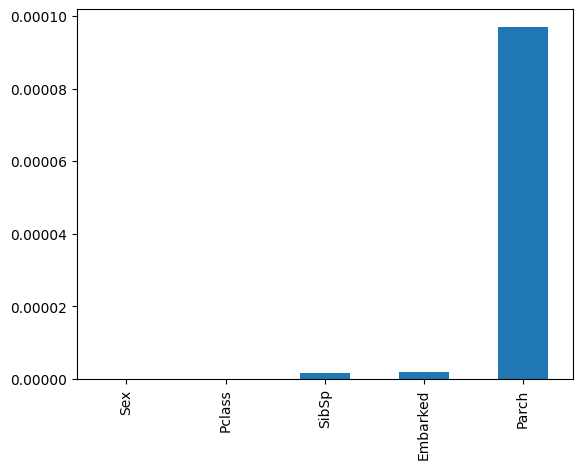

In [54]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
statistic, pvalue = chi2(X, y)
pvalue

array([1.58171493e-13, 6.07783826e-22, 2.66235537e-01, 1.48470676e-03,
       1.78791305e-03])

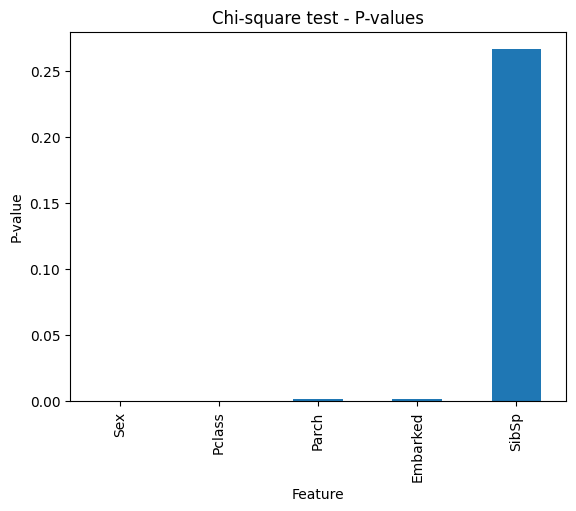

In [63]:
# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()